## 测试计算信息熵函数

In [213]:
from imp import reload
import ipynbImporter
import decisionTree
import treePlotter
import operator
myData, labels = decisionTree.createDataSet()
myTree = decisionTree.createTree(myData, labels)

## 构建按照给定特征划分数据集函数


In [4]:
dataSet = myData
axis = 1 
value = 1
returnDataSet = []
for featVec in dataSet:   #dataSet本质上是元素为列表的列表，此语句表示一个一个列表的遍历数据集
    if featVec[axis] == value:    #判断当前列表中序号为axis的元素的值是否为value
        tempVec = featVec[:axis]   #将当前列表中axis位元素之前的所有元素放入列表tempVec中
        tempVec.extend(featVec[axis+1:])#将当前列表中axis位元素之后的所有元素接到列表tempVec中
        returnDataSet.append(tempVec)  #将列表tempVec放入大列表returnDataSet中，一个列表一个列表的存放
returnDataSet

[[1, 'yes'], [1, 'yes'], [0, 'no'], [0, 'no']]

## 测试按照给定特征划分数据集函数 

In [5]:
subDataSet = decisionTree.splitDataSet(myData, 0, 1)
subDataSet

[[1, 'yes'], [1, 'yes'], [0, 'no']]

## 选择最好的数据集划分特征

In [11]:
dataSet = myData

numOfFeatures = len(dataSet[0])-1   #找出数据集中第一个元素的特征维度，-1是因为要减去类别这一为维
baseEnt = decisionTree.calcShannonEnt(dataSet)
bestInfoGain = 0  
bestFeature = -1
for i in range(numOfFeatures):
    featList = [example[i] for example in dataSet]  #将第i个特征的所有取值找到 ###牛逼###
    uniqueVals = set(featList)                      #第i个特征的每种取值只取一次，相当与找到所有可能的子节点
    tempEnt = 0
    newEnt = 0
    for tempValue in uniqueVals:                    #遍历每个子节点
        subDataSet = decisionTree.splitDataSet(dataSet, i, tempValue)  #找到每个子节点
        prob = len(subDataSet)/float(len(dataSet))                    #计算该子节点的权重
        newEnt += prob*decisionTree.calcShannonEnt(subDataSet)      #计算所有子节点总的信息熵
    infoGain = baseEnt - newEnt
    if infoGain > bestInfoGain:
        bestInfoGain = infoGain
        bestFeature = i
    #print(infoGain)
bestFeature
#return bestFeature

0.4199730940219749
0.17095059445466854


0

## 测试函数chooseBestFeatToSplit(dataSet) 

In [26]:
decisionTree.chooseBestFeatToSplit(myData)

0

## 将叶子节点中出现次数最多的类标签作为该叶子节点的类标签 

In [61]:
classList = ['yes','no','no','no','yes','no']
classCount = {}
for classLabel in classList:
    classCount[classLabel] = classCount.get(classLabel, 0) +1
    sortedClassCount = sorted(classCount.items(), key = operator.itemgetter(1), reverse = True)
sortedClassCount[1][1]
#return srotedClassCount[0][0]

2

## 测试majorityCnt()函数

In [98]:
classList = ['yes','no','yes','yes','yes','no']
decisionTree.majorityCnt(classList)

'yes'

## 创建决策树

In [3]:
decisionTree.createTree(myData, labels)
# classList

{'no surfacing': {0: 'no', 1: {'flippers': {0: 'no', 1: 'yes'}}}}

## 绘制注解

importing Jupyter notebook from treePlotter.ipynb


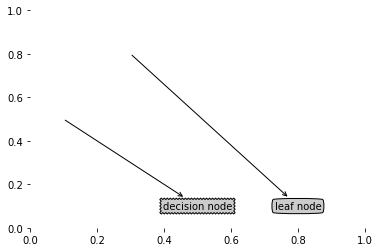

In [33]:
from imp import reload
import ipynbImporter
import treePlotter
reload(treePlotter)
treePlotter.createPlot()

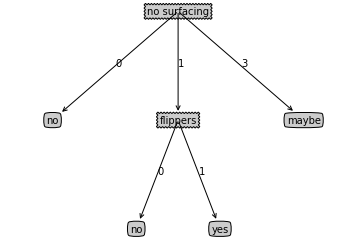

In [75]:
# reload(treePlotter)
# treePlotter.getNumLeafs(myTree)
# treePlotter.getTreeDepth(myTree)
myTree['no surfacing'][3] = 'maybe'
treePlotter.createPlot(myTree)


In [171]:
# reload(decisionTree)
# myTree['no surfacing'][3] = 'maybe'
decisionTree.classify(myTree, labels, [1,1])

'yes'

In [219]:
# reload(decisionTree)
decisionTree.storeTree(myTree, 'classifierStorage.txt')
# decisionTree.grabTree('classifierStorage.txt')

# 隐形眼镜数据集测试

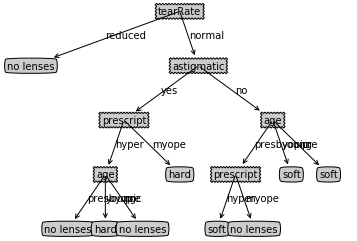

In [2]:
from imp import reload
import ipynbImporter
import decisionTree
import treePlotter

fr = open('lenses.txt')
lenses = [inst.strip().split('\t') for inst in fr.readlines()]
lensesLabels = ['age', 'prescript', 'astigmatic', 'tearRate']
lensesTree = decisionTree.createTree(lenses, lensesLabels)
treePlotter.createPlot(lensesTree)